In [1]:
import pandas
import seaborn
import sklearn
import functions as covid_lib
from random import random
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from dash.dependencies import Input, Output 

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

---
## 1st Dataset : John Hopkins Data

In [2]:
## John Hopkins Center for Systems Science and Engineer Data Base URL
## Contains timeseries data
## This set of data is updated daily
baseURL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

cumulated_confirmed_url = baseURL + "time_series_covid19_confirmed_global.csv"
cumulated_deaths_url    = baseURL + "time_series_covid19_deaths_global.csv"
cumulated_recovered_url = baseURL + "time_series_covid19_recovered_global.csv"

cumulated_confirmed     = pd.read_csv(cumulated_confirmed_url)
cumulated_deaths        = pd.read_csv(cumulated_deaths_url)
cumulated_recovered     = pd.read_csv(cumulated_recovered_url)

## Processed Dataset
## Combine by Country/Region
cumulated_confirmed_country = covid_lib.df_groupby_countries(cumulated_confirmed)
cumulated_deaths_country = covid_lib.df_groupby_countries(cumulated_deaths)
cumulated_recovered_country = covid_lib.df_groupby_countries(cumulated_recovered)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
print("Confirmed data shape : " + str(cumulated_confirmed_country.shape))
print("Recovered data shape : " + str(cumulated_deaths_country.shape))
print("Deaths data shape : " + str(cumulated_recovered_country.shape))

Confirmed data shape : (188, 170)
Recovered data shape : (188, 170)
Deaths data shape : (188, 170)


In [4]:
# ## To find specific instances on certain countries
# ## Consider grouping by countries to simplify the analysis process
# cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()

In [5]:
cumulated_confirmed_country.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404
3,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,...,259,267,276,284,291,315,328,346,346,346


In [6]:
unique_countries = cumulated_confirmed_country["Country/Region"].unique()

In [7]:
cumulated_deaths_country[cumulated_deaths_country["Country/Region"]=="Taiwan*"]


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20
165,Taiwan*,23.7,121.0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


In [8]:
## Call this only if you wanna wait forever
proceed = False
if proceed:
    for country in unique_countries:
        covid_lib.plt_all_cases_increase_cases(country, cumulated_confirmed_country  )

In [9]:
# US_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()
# US_confirmed

# all_cases, increased_case = covid_lib.df_to_timeseries(US_confirmed, 7)

In [10]:
query_country = "Taiwan*"
query_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]==query_country]
queried_total_cases, queried_increased_case = covid_lib.df_to_timeseries(query_confirmed, 1)
model = SARIMAX(queried_total_cases, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
yhat = model_fit.predict(len(queried_total_cases), len(queried_total_cases)+10)
print(yhat)
covid_lib.plot_all( queried_total_cases, queried_increased_case, yhat , query_country )

[449.03682601 449.05480375 449.07924721 449.10176781 449.1248194
 449.14773088 449.17067821 449.19361656 449.21655713 449.23949716
 449.26243732]


### Taiwan Analysis

In [11]:
# TW_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="Taiwan*"].head()
# total_cases, increased_case = covid_lib.df_to_timeseries(TW_confirmed, 7)


### US Analysis

In [12]:
US_confirmed = cumulated_confirmed.loc[cumulated_confirmed["Country/Region"]=="US"].head()
total_cases, increased_case = covid_lib.df_to_timeseries(US_confirmed, 7)


In [13]:
### TODO : I doing SARIMA on the total or the increase index?

---

### Changes in total Cases

In [14]:

# SARIMA example
model = SARIMAX(total_cases, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=True)
yhat = model_fit.predict(len(total_cases), len(total_cases)+100)
print(yhat)

[2980122.67741964 3024236.21472373 3068346.00232411 3112455.77073846
 3156565.59138196 3200675.40046517 3244785.21149426 3288895.02223117
 3333004.83300927 3377114.64378179 3421224.45455505 3465334.26532821
 3509444.07610139 3553553.88687456 3597663.69764774 3641773.50842091
 3685883.31919408 3729993.12996726 3774102.94074043 3818212.7515136
 3862322.56228678 3906432.37305995 3950542.18383312 3994651.9946063
 4038761.80537947 4082871.61615264 4126981.42692582 4171091.23769899
 4215201.04847216 4259310.85924534 4303420.67001851 4347530.48079168
 4391640.29156486 4435750.10233803 4479859.9131112  4523969.72388438
 4568079.53465755 4612189.34543072 4656299.1562039  4700408.96697707
 4744518.77775024 4788628.58852342 4832738.39929659 4876848.21006976
 4920958.02084294 4965067.83161611 5009177.64238928 5053287.45316246
 5097397.26393563 5141507.0747088  5185616.88548198 5229726.69625515
 5273836.50702832 5317946.3178015  5362056.12857467 5406165.93934784
 5450275.75012102 5494385.56089419 5

### Changes in increase curve

In [15]:

model = SARIMAX(increased_case.dropna(), order=(1, 1, 1), seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=True) 
yhat = model_fit.predict(len(increased_case.dropna()), len(increased_case.dropna())+100)
print(yhat)

2020-07-07    351451.917303
2020-07-08    357036.285231
2020-07-09    362683.849884
2020-07-10    368323.696771
2020-07-11    373964.426167
                  ...      
2020-10-11    892903.474811
2020-10-12    898544.116736
2020-10-13    904184.758661
2020-10-14    909825.400586
2020-10-15    915466.042511
Freq: D, Length: 101, dtype: float64


/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



---

In [16]:
covid_lib.plot_all( total_cases, increased_case, yhat , "Taiwan" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'yhat')

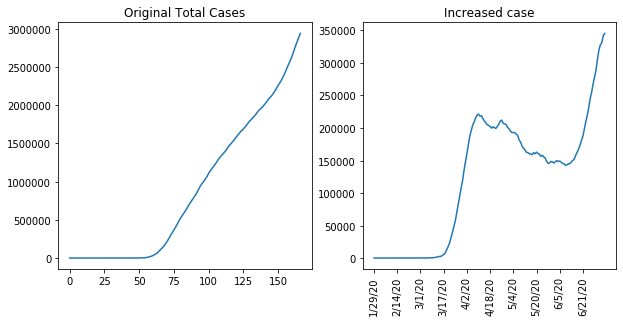

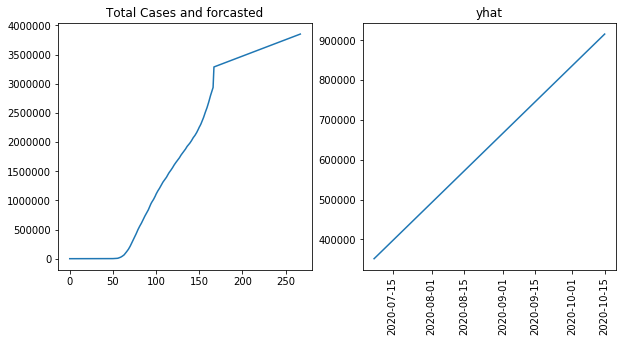

In [17]:

### Plotting

predicted_cases = np.concatenate((total_cases[:,0], yhat + total_cases[-1,0]))

figure = plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title("Original Total Cases")
plt.plot(total_cases)

plt.subplot(2,2,2)
plt.plot(increased_case.dropna())
plt.title("Increased case")
plt.xticks(rotation=90)
plt.xticks(np.arange(0, len(increased_case.dropna()), (len(increased_case.dropna()) / 10))) 

figure = plt.figure(figsize = (10,10))
plt.subplot(2,2,3)
plt.plot(predicted_cases)
plt.title("Total Cases and forcasted")


plt.subplot(2,2,4)
plt.plot(yhat)
plt.xticks(rotation=90)
plt.title("yhat")


In [18]:
# total_cases
# increased_case.values

Test RMSE: 167.420


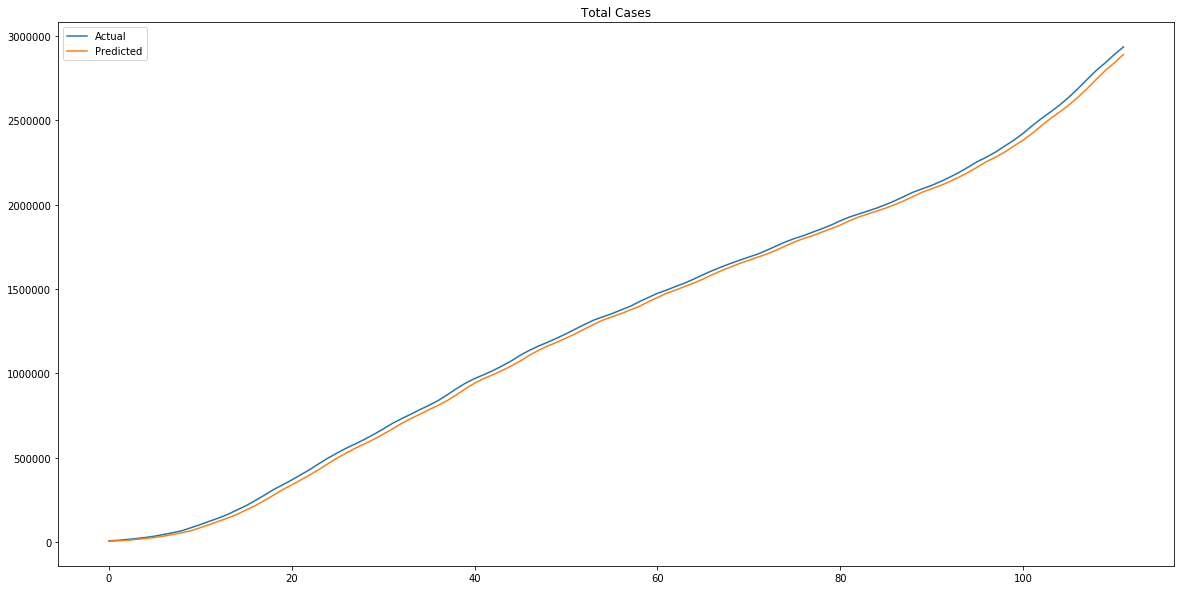

In [19]:
predictions_ = covid_lib.SARIMA_PREDICT(total_cases,"Total Cases", (0,1,0))

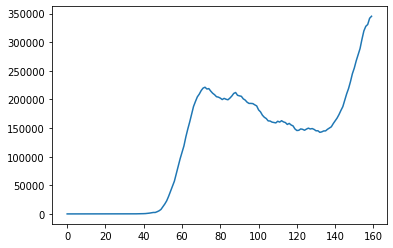

In [22]:
plt.plot(increase_temp )


/home/mavericku/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



Test RMSE: 17.169


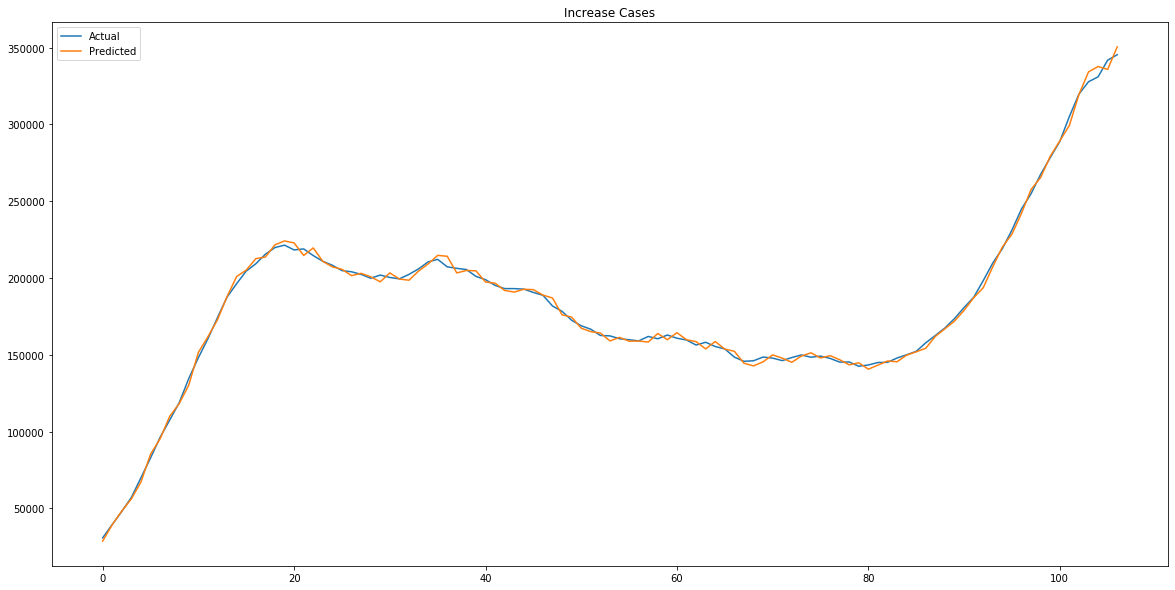

In [21]:
increase_temp = increased_case.values 
increase_predict = covid_lib.SARIMA_PREDICT(increase_temp, "Increase Cases" )